In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Get The data
raw_data = pd.read_csv(('weatherAUS.csv'))

# Checking all the null vals
raw_data.isnull().sum()

# filling all the null values from the numerical data with their respective mean value
# This method is taken from a kaggle code, but we have some different names, but 
# I think i'ts okey to use the same method.

raw_data['MinTemp']=raw_data['MinTemp'].fillna(raw_data['MinTemp'].mean())
raw_data['MaxTemp']=raw_data['MaxTemp'].fillna(raw_data['MaxTemp'].mean())
raw_data['Rainfall']=raw_data['Rainfall'].fillna(raw_data['Rainfall'].mean())
raw_data['Evaporation']=raw_data['Evaporation'].fillna(raw_data['Evaporation'].mean())
raw_data['Sunshine']=raw_data['Sunshine'].fillna(raw_data['Sunshine'].mean())
raw_data['WindGustSpeed']=raw_data['WindGustSpeed'].fillna(raw_data['WindGustSpeed'].mean())
raw_data['WindSpeed9am']=raw_data['WindSpeed9am'].fillna(raw_data['WindSpeed9am'].mean())
raw_data['WindSpeed3pm']=raw_data['WindSpeed3pm'].fillna(raw_data['WindSpeed3pm'].mean())
raw_data['Humidity9am']=raw_data['Humidity9am'].fillna(raw_data['Humidity9am'].mean())
raw_data['Humidity3pm']=raw_data['Humidity3pm'].fillna(raw_data['Humidity3pm'].mean())
raw_data['Pressure9am']=raw_data['Pressure9am'].fillna(raw_data['Pressure9am'].mean())
raw_data['Pressure3pm']=raw_data['Pressure3pm'].fillna(raw_data['Pressure3pm'].mean())
raw_data['Cloud9am']=raw_data['Cloud9am'].fillna(raw_data['Cloud9am'].mean())
raw_data['Cloud3pm']=raw_data['Cloud3pm'].fillna(raw_data['Cloud3pm'].mean())
raw_data['Temp9am']=raw_data['Temp9am'].fillna(raw_data['Temp9am'].mean())
raw_data['Temp3pm']=raw_data['Temp3pm'].fillna(raw_data['Temp3pm'].mean())    

# Filling all the null values from the categorical data with their most frequently occurring value
raw_data['WindGustDir']=raw_data['WindGustDir'].fillna(raw_data['WindGustDir'].mode()[0])
raw_data['WindDir9am']=raw_data['WindDir9am'].fillna(raw_data['WindDir9am'].mode()[0])
raw_data['WindDir3pm']=raw_data['WindDir3pm'].fillna(raw_data['WindDir3pm'].mode()[0])
raw_data['RainToday']=raw_data['RainToday'].fillna(raw_data['RainToday'].mode()[0])
raw_data['RainTomorrow']=raw_data['RainTomorrow'].fillna(raw_data['RainTomorrow'].mode()[0])

# making categorical yes and no to 1 and 0 respectivevly
raw_data['RainTomorrow']=raw_data['RainTomorrow'].map({'Yes':1,'No':0})
raw_data['RainToday']=raw_data['RainToday'].map({'Yes':1,'No':0})

# from date convert to day, month
raw_data['Date']=pd.to_datetime(raw_data['Date'])
raw_data['day']=raw_data['Date'].dt.day
raw_data['month']=raw_data['Date'].dt.month

#drop date
raw_data.drop('Date',axis=1,inplace=True)

#Make onehot
raw_data = pd.get_dummies(raw_data)
raw_data_everything = raw_data.copy()
raw_data.head(5)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


### Principal components analysis

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

raw_data_pp = StandardScaler().fit_transform(raw_data)
pca = PCA().fit(raw_data_pp)

# The PCA object offers convenient ways of accessing the
# principal directions and explained variance
pca.components_;
pca.explained_variance_;

# To get the principal components, the `transform` method of the
# PCA object can be used
principal_components_pca = pca.transform(raw_data_pp)

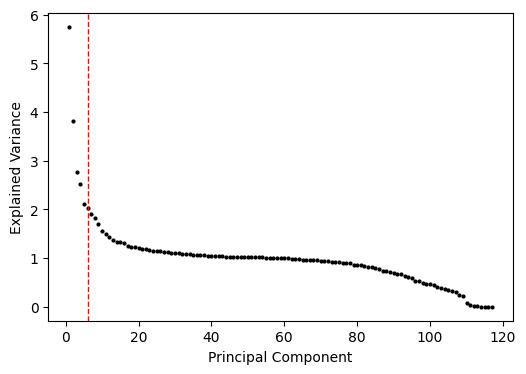

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'ok', markersize=2)
ax.axvline(6, linestyle="dashed", color="red", linewidth=1)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance");

Looking at the screen plot, a good cut-off is after 5 principal components, since 5 and 6 are very close. So we could keep the first six columns of principal_components.

### Mislabel the dataset

In [6]:
import pandas as pd
import numpy as np

# Get three copies of the original data set to mislabel in three different levels
mislabel_data1 = raw_data.copy()
mislabel_data2 = raw_data.copy()
mislabel_data3 = raw_data.copy()

# Define the percentage of labels to be swapped
mislabeling_level1 = 20
mislabeling_level2 = 50
mislabeling_level3 = 70

# Convert the labels to a numpy array for easier manipulation
misclass_labels = np.array(raw_data['RainTomorrow'])

# Calculate the number of labels to swap based on the percentage
n_swap1 = int(len(misclass_labels) * mislabeling_level1 / 100)
n_swap2 = int(len(misclass_labels) * mislabeling_level2 / 100)
n_swap3 = int(len(misclass_labels) * mislabeling_level3 / 100)

# Randomly select the indices of the labels to be swapped
swap_indices1 = np.random.choice(len(misclass_labels), n_swap1, replace=False)
swap_indices2 = np.random.choice(len(misclass_labels), n_swap2, replace=False)
swap_indices3 = np.random.choice(len(misclass_labels), n_swap3, replace=False)

# Swap the labels at the selected indices to their opposite values
misclass_labels1 = misclass_labels.copy()
misclass_labels1[swap_indices1] = 1 - misclass_labels1[swap_indices1]

misclass_labels2 = misclass_labels.copy()
misclass_labels2[swap_indices2] = 1 - misclass_labels2[swap_indices2]

misclass_labels3 = misclass_labels.copy()
misclass_labels3[swap_indices3] = 1 - misclass_labels3[swap_indices3]

# Create new data frames from the modified label arrays
mislabel_data1['RainTomorrow'] = pd.DataFrame(misclass_labels1, columns=['RainTomorrow'])
mislabel_data2['RainTomorrow'] = pd.DataFrame(misclass_labels2, columns=['RainTomorrow'])
mislabel_data3['RainTomorrow'] = pd.DataFrame(misclass_labels3, columns=['RainTomorrow'])

In [7]:
#label are the value we want to predict
labels=raw_data['RainTomorrow']

#remove the label from the features
raw_data=raw_data.drop('RainTomorrow',axis=1)
mislabel_data1 = mislabel_data1.drop('RainTomorrow',axis=1)
mislabel_data2 = mislabel_data2.drop('RainTomorrow',axis=1)
mislabel_data3 = mislabel_data3.drop('RainTomorrow',axis=1)


#saving feature name 
feature_list=list(raw_data.columns)

### Splitting the data into training and test split

In [8]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# Split to get unaltered test set
_, test_features, _, test_labels = train_test_split(raw_data, labels, test_size=0.20, random_state=42)

# Split to get 3 training sets with mislabeled data
train_features1, _, train_labels1, _ = train_test_split(mislabel_data1, misclass_labels1, test_size=0.20, random_state=42)
train_features2, _, train_labels2, _ = train_test_split(mislabel_data2, misclass_labels2, test_size=0.20, random_state=42)
train_features3, _, train_labels3, _ = train_test_split(mislabel_data3, misclass_labels3, test_size=0.20, random_state=42)

In [9]:
# pca
pca = PCA(n_components=5)

train_features_pca1 = pca.fit_transform(train_features1)
train_features_pca2 = pca.fit_transform(train_features2)
train_features_pca3 = pca.fit_transform(train_features3)
test_features_pca = pca.fit_transform(test_features)


## KNN

***for 20% misclassified***

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(20, weights='uniform')
model.fit(train_features1, train_labels1)
#calculate accuracy
accuracy=model.score(test_features, test_labels)
print('Accuracy: ',round(accuracy,2)*100,'%')

Accuracy:  83.0 %


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


# Uncomment if not performed the cross validation
best_k = 41 #Best found k found to be 31/41


# Train a K-nearest neighbor classifier on the projected data
knn1 = KNeighborsClassifier(n_neighbors=best_k)
knn1.fit(train_features_pca1, train_labels1)
accuracy=knn1.score(test_features_pca, test_labels)
print('Accuracy: ',round(accuracy,2)*100,'%')

Accuracy:  81.0 %


***for 30% misclassified***

In [12]:
model.fit(train_features2, train_labels2)
#calculate accuracy
accuracy=model.score(test_features, test_labels)
print('Accuracy: ',round(accuracy,2)*100,'%')

Accuracy:  55.00000000000001 %


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


# Uncomment if not performed the cross validation
best_k = 41 #Best found k found to be 31/41


# Train a K-nearest neighbor classifier on the projected data
knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(train_features_pca2, train_labels2)
accuracy=knn1.score(test_features_pca, test_labels)
print('Accuracy: ',round(accuracy,2)*100,'%')

Accuracy:  81.0 %


***for 40% misclassified***

In [14]:
model.fit(train_features3, train_labels3)
#calculate accuracy
accuracy=model.score(test_features, test_labels)
print('Accuracy: ',round(accuracy,2)*100,'%')

Accuracy:  22.0 %


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


# Uncomment if not performed the cross validation
best_k = 41 #Best found k found to be 31/41

# Train a K-nearest neighbor classifier on the projected data
knn3 = KNeighborsClassifier(n_neighbors=best_k)
knn3.fit(train_features_pca3, train_labels3)
accuracy=knn3.score(test_features_pca, test_labels)
print('Accuracy: ',round(accuracy,2)*100,'%')

Accuracy:  21.0 %


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

***for 20% misclassified:***

In [17]:
LogReg1 = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
LogReg1.fit(train_features1, train_labels1)
print(LogReg1.score(test_features, test_labels))

0.845077684586828


In [18]:
# Train a Logistic regression classifier on the projected data
LogReg1.fit(train_features_pca1, train_labels1)
print(LogReg1.score(test_features_pca, test_labels))

0.8156194142719648


***for 30% misclassified:***

In [19]:
LogReg2 = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
LogReg2.fit(train_features2, train_labels2)
print(LogReg2.score(test_features, test_labels))

0.5000343737109858


In [20]:
# Train a Logistic regression classifier on the projected data
LogReg2.fit(train_features_pca2, train_labels2)
print(LogReg2.score(test_features_pca, test_labels))

0.47734772446033275


***for 40% misclassified:***

In [21]:
LogReg3 = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
LogReg3.fit(train_features3, train_labels3)
print(LogReg3.score(test_features, test_labels))

0.15571291076584629


In [22]:
# Train a Logistic regression classifier on the projected data
LogReg3.fit(train_features_pca3, train_labels3)
print(LogReg3.score(test_features_pca, test_labels))

0.184208717173106


# LDA

***For 20% misclassified:***

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA1 = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
LDA1.fit(train_features1, train_labels1)
print(LDA1.score(test_features, test_labels))

0.8453870479857005


In [24]:
# Train a LDA classifier on the projected data
LDA1.fit(train_features_pca1, train_labels1)
print(LDA1.score(test_features_pca, test_labels))

0.8151038086071772


***For 30% misclassified:***

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA2 = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
LDA2.fit(train_features2, train_labels2)
print(LDA2.score(test_features, test_labels))

0.49996562628901414


In [26]:
# Train a LDA classifier on the projected data
LDA2.fit(train_features_pca2, train_labels2)
print(LDA2.score(test_features_pca, test_labels))

0.47734772446033275


***For 40% misclassified:***

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA3 = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
LDA3.fit(train_features3, train_labels3)
print(LDA3.score(test_features, test_labels))

0.1553691736559879


In [28]:
# Train a LDA classifier on the projected data
LDA3.fit(train_features_pca3, train_labels3)
print(LDA3.score(test_features_pca, test_labels))

0.18403684861817682


### Cross-validation comparison between the different classifier methods

In [29]:
from sklearn.model_selection import cross_validate
scoring = ['f1_macro', 'accuracy', 'roc_auc']

***For 20% misclassified:***

In [30]:
cv_knn1 = cross_validate(knn1, train_features_pca1, train_labels1, cv=10, scoring=scoring)
cv_LogReg1 = cross_validate(LogReg1, train_features_pca1, train_labels1, cv=10, scoring=scoring)
cv_LDA1 = cross_validate(LDA1, train_features_pca1, train_labels1, cv=10, scoring=scoring)

print(f"KNN F1 Macro: {np.mean(cv_knn1['test_f1_macro'])}, Accuracy: {np.mean(cv_knn1['test_accuracy'])}, ROC AUC: {np.mean(cv_knn1['test_roc_auc'])}")
print(f"Logistic Regression: F1 Macro: {np.mean(cv_LogReg1['test_f1_macro'])}, Accuracy: {np.mean(cv_LogReg1['test_accuracy'])}, ROC AUC: {np.mean(cv_LogReg1['test_roc_auc'])}")
print(f"LDA: F1 Macro: {np.mean(cv_LDA1['test_f1_macro'])}, Accuracy: {np.mean(cv_LDA1['test_accuracy'])}, ROC AUC: {np.mean(cv_LDA1['test_roc_auc'])}")

KNN F1 Macro: 0.5797227983436777, Accuracy: 0.6989292319607511, ROC AUC: 0.6370006093269331
Logistic Regression: F1 Macro: 0.5578713475895829, Accuracy: 0.6979925732968535, ROC AUC: 0.6522242789293131
LDA: F1 Macro: 0.5616457751107783, Accuracy: 0.6982417954041342, ROC AUC: 0.6521010386981592


***For 30% misclassified:***

In [31]:
cv_knn2 = cross_validate(knn2, train_features_pca2, train_labels2, cv=10, scoring=scoring)
cv_LogReg2 = cross_validate(LogReg2, train_features_pca2, train_labels2, cv=10, scoring=scoring)
cv_LDA2 = cross_validate(LDA2, train_features_pca2, train_labels2, cv=10, scoring=scoring)

print(f"KNN F1 Macro: {np.mean(cv_knn2['test_f1_macro'])}, Accuracy: {np.mean(cv_knn2['test_accuracy'])}, ROC AUC: {np.mean(cv_knn2['test_roc_auc'])}")
print(f"Logistic Regression: F1 Macro: {np.mean(cv_LogReg2['test_f1_macro'])}, Accuracy: {np.mean(cv_LogReg2['test_accuracy'])}, ROC AUC: {np.mean(cv_LogReg2['test_roc_auc'])}")
print(f"LDA: F1 Macro: {np.mean(cv_LDA2['test_f1_macro'])}, Accuracy: {np.mean(cv_LDA2['test_accuracy'])}, ROC AUC: {np.mean(cv_LDA2['test_roc_auc'])}")

KNN F1 Macro: 0.5027963025409843, Accuracy: 0.5028272548653135, ROC AUC: 0.5035812388206373
Logistic Regression: F1 Macro: 0.4894429174219884, Accuracy: 0.4977313895741505, ROC AUC: 0.4985973719056382
LDA: F1 Macro: 0.489414017833233, Accuracy: 0.49772279481707943, ROC AUC: 0.49860092212772844


***For 40% misclassified:***

In [32]:
cv_knn3 = cross_validate(knn3, train_features_pca3, train_labels3, cv=10, scoring=scoring)
cv_LogReg3 = cross_validate(LogReg3, train_features_pca3, train_labels3, cv=10, scoring=scoring)
cv_LDA3 = cross_validate(LDA3, train_features_pca3, train_labels3, cv=10, scoring=scoring)

print(f"Accuracy: {np.mean(cv_knn3['test_accuracy'])}")
print(f"Accuracy: {np.mean(cv_LogReg3['test_accuracy'])}")
print(f"Accuracy: {np.mean(cv_LDA3['test_accuracy'])}")

#print(f"KNN F1 Macro: {np.mean(cv_knn3['test_f1_macro'])}, Accuracy: {np.mean(cv_knn3['test_accuracy'])}, ROC AUC: {np.mean(cv_knn3['test_roc_auc'])}")
#print(f"Logistic Regression: F1 Macro: {np.mean(cv_LogReg3['test_f1_macro'])}, Accuracy: {np.mean(cv_LogReg3['test_accuracy'])}, ROC AUC: {np.mean(cv_LogReg3['test_roc_auc'])}")
#print(f"LDA: F1 Macro: {np.mean(cv_LDA3['test_f1_macro'])}, Accuracy: {np.mean(cv_LDA3['test_accuracy'])}, ROC AUC: {np.mean(cv_LDA3['test_roc_auc'])}")

Accuracy: 0.6268045607482422
Accuracy: 0.6311099040935001
Accuracy: 0.6312044353436617


### Plotting the result

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

def scaleColumns(df, cols_to_scale):
    min_max_scaler = preprocessing.MinMaxScaler()
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

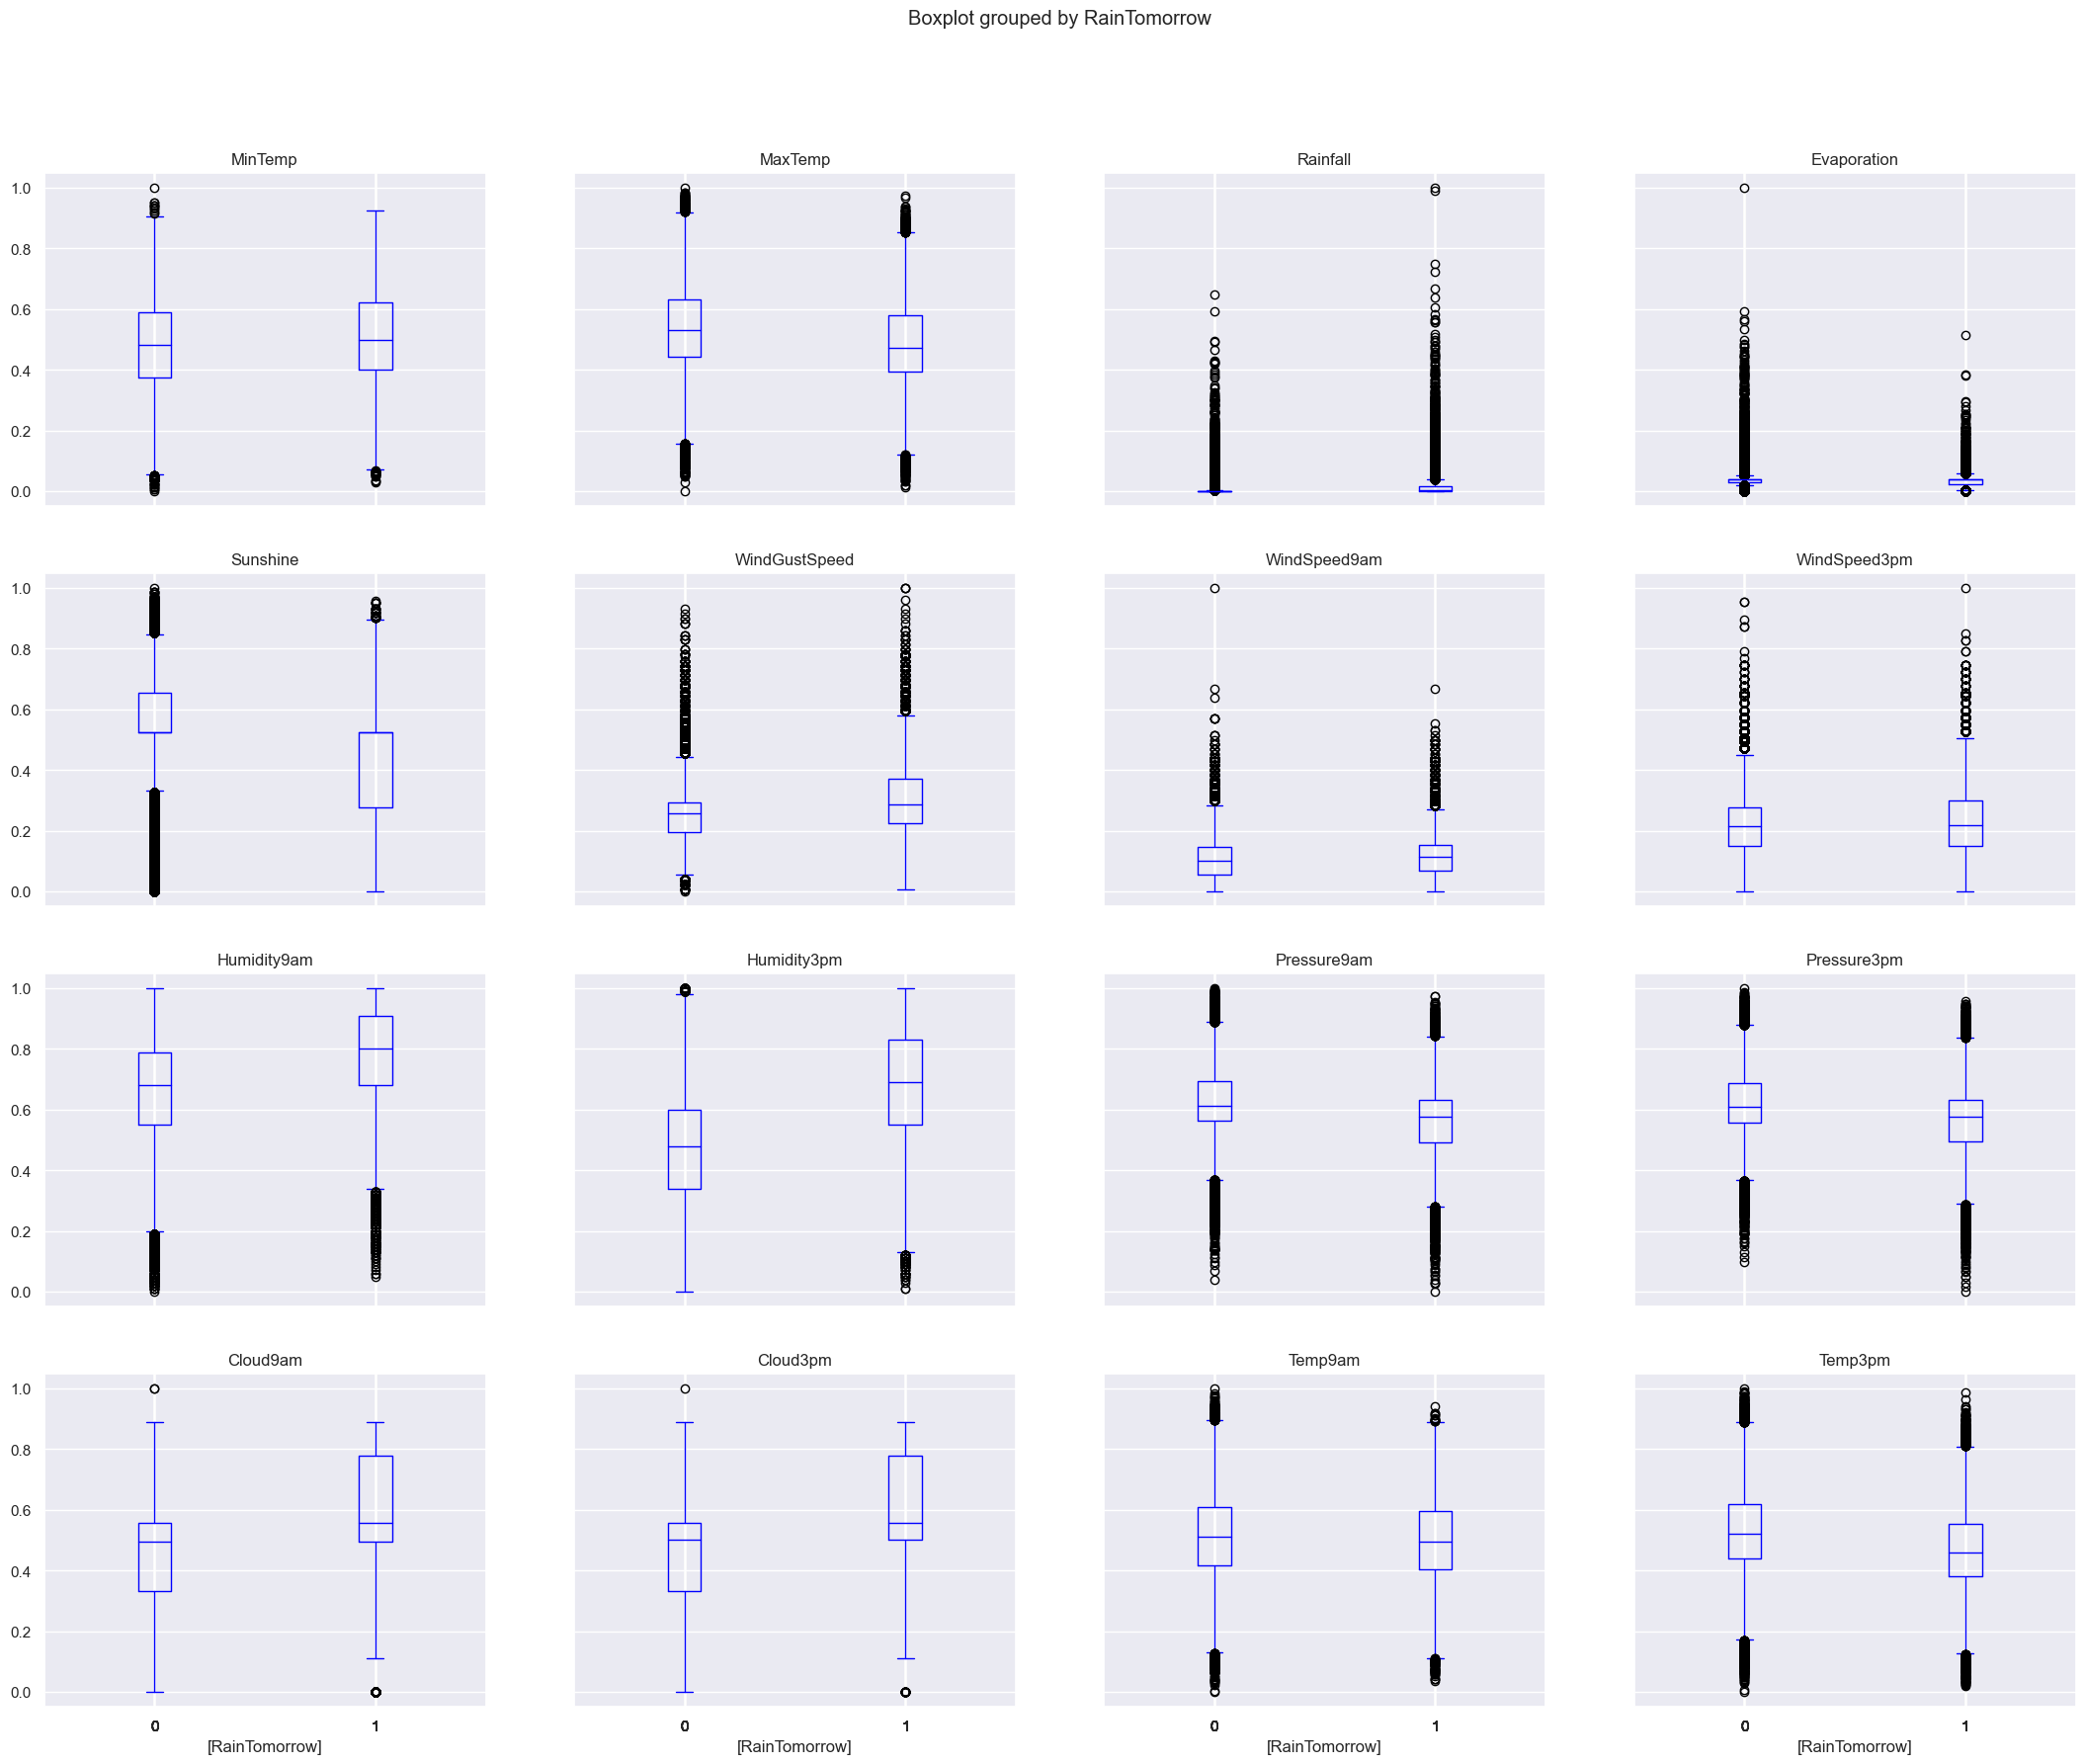

In [44]:
df = raw_data_everything.copy()
scaled_df = scaleColumns(df,['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm'])

boxplot = scaled_df.boxplot(column=['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm'],
 by=['RainTomorrow'], 
 figsize=(25.7,20.7),
 color = 'blue')  
